In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv('crop_yield.csv')
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [3]:
df.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [4]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In [5]:
df.shape

(19689, 10)

In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

Dataset Overview:
* Number of Entries: 19689 rows
* Number of Columns: 10 columns

In [9]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe(include=['int64', 'float64']).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,"19,689.00","2,009.13",6.50,"1,997.00","2,004.00","2,010.00","2,015.00","2,020.00"
Area,"19,689.00","179,926.57","732,828.68",0.50,"1,390.00","9,317.00","75,112.00","50,808,100.00"
Production,"19,689.00","16,435,941.27","263,056,839.81",0.00,"1,393.00","13,804.00","122,718.00","6,326,000,000.00"
Annual_Rainfall,"19,689.00","1,437.76",816.91,301.30,940.70,"1,247.60","1,643.70","6,552.70"
Fertilizer,"19,689.00","24,103,312.45","94,946,004.48",54.17,"188,014.62","1,234,957.44","10,003,847.20","4,835,406,877.00"
Pesticide,"19,689.00","48,848.35","213,287.35",0.09,356.70,"2,421.90","20,041.70","15,750,511.00"
Yield,"19,689.00",79.95,878.31,0.00,0.60,1.03,2.39,"21,105.00"


In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


In [11]:
df.isnull().sum().to_frame().rename(columns={0: 'Missing Values'})

,Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [12]:
print("Duplicate Values =", df.duplicated().sum())

Duplicate Values = 0


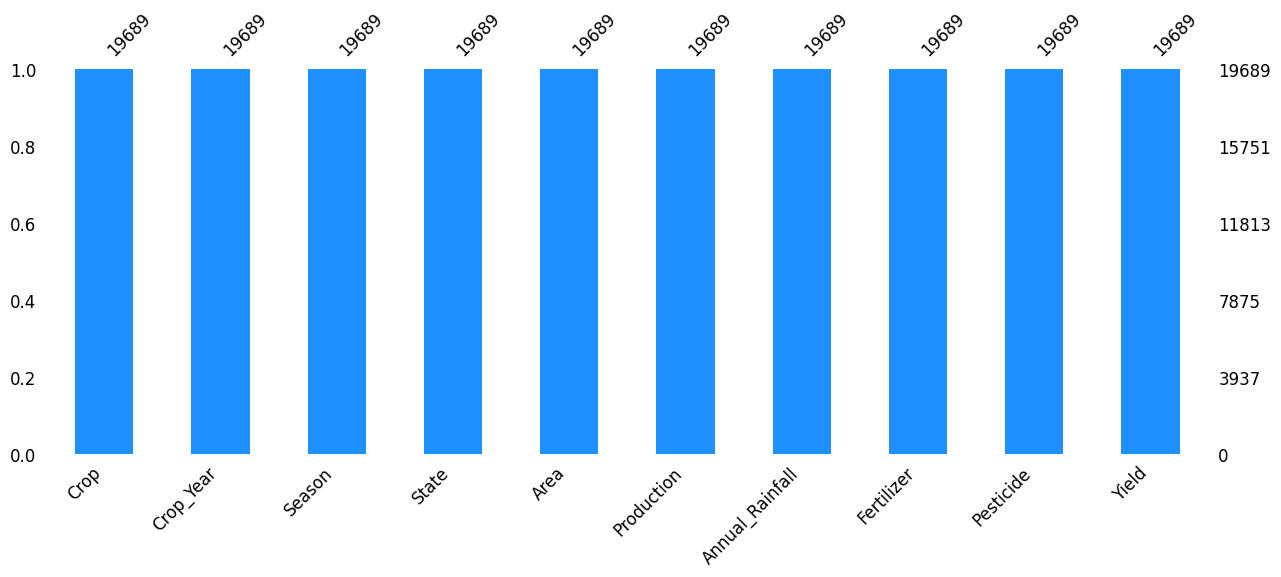

In [13]:
import missingno

missingno.bar(df, figsize=(15,5), fontsize=12, color='dodgerblue', sort='ascending');
plt.show()

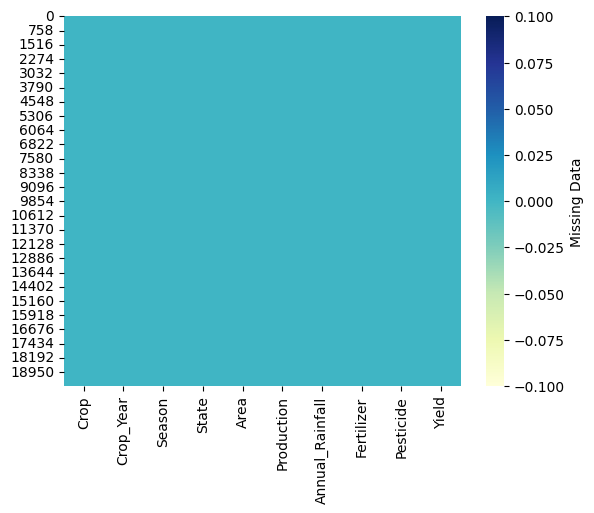

In [14]:
plt.Figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'});

In [15]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,"73,814.00",56708,"2,051.40","7,024,878.38","22,882.34",0.80
1,1997,"6,637.00",4685,"2,051.40","631,643.29","2,057.47",0.71
2,1997,796.00,22,"2,051.40","75,755.32",246.76,0.24
3,1997,"19,656.00",126905000,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,1997,"1,739.00",794,"2,051.40","165,500.63",539.09,0.42


In [16]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


Correlation matrix for numeric columns

In [17]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


In [18]:
import plotly.express as px

fig = px.imshow(numeric_data.corr(), text_auto=True, aspect="auto")
fig.show()

In [19]:
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64

Remove records for year 2020

In [20]:
df= df[df['Crop_Year']  !=2020]

Count details for each crops

In [21]:
df['Crop'].value_counts(ascending=False)

Crop
Rice                     1195
Maize                     973
Moong(Green Gram)         738
Urad                      731
Groundnut                 724
Sesamum                   684
Potato                    626
Sugarcane                 604
Wheat                     544
Rapeseed &Mustard         527
Bajra                     524
Jowar                     513
Arhar/Tur                 507
Ragi                      497
Gram                      489
Small Millets             484
Cotton(Lint)              476
Onion                     453
Sunflower                 439
Dry Chillies              419
Other Kharif Pulses       381
Horse-Gram                370
Peas & Beans (Pulses)     368
Tobacco                   363
Other  Rabi Pulses        354
Soyabean                  348
Turmeric                  336
Masoor                    323
Ginger                    323
Linseed                   308
Castor Seed               300
Barley                    296
Sweet Potato              273
Garli

Count details for each season

In [22]:
df['Season'].value_counts(ascending=False)

Season
Kharif         8215
Rabi           5732
Whole Year     3712
Summer         1190
Autumn          414
Winter          389
Name: count, dtype: int64

Count details for each state 

In [23]:
df['State'].value_counts(ascending=False)

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Odisha                760
Assam                 731
Uttarakhand           727
Nagaland              689
Puducherry            670
Meghalaya             649
Jammu And Kashmir     631
Haryana               631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Punjab                397
Telangana             397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

Crop yield per state

In [24]:
df_state_sort = df.groupby('State', as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

,State,Yield
29,West Bengal,"291,986.75"
21,Puducherry,"232,163.60"
0,Andhra Pradesh,"229,735.18"
24,Tamil Nadu,"185,813.28"
2,Assam,"160,612.65"
12,Karnataka,"151,391.87"
13,Kerala,"147,710.35"
6,Goa,"87,275.96"
25,Telangana,"39,508.73"
7,Gujarat,"5,471.63"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\1687405366.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




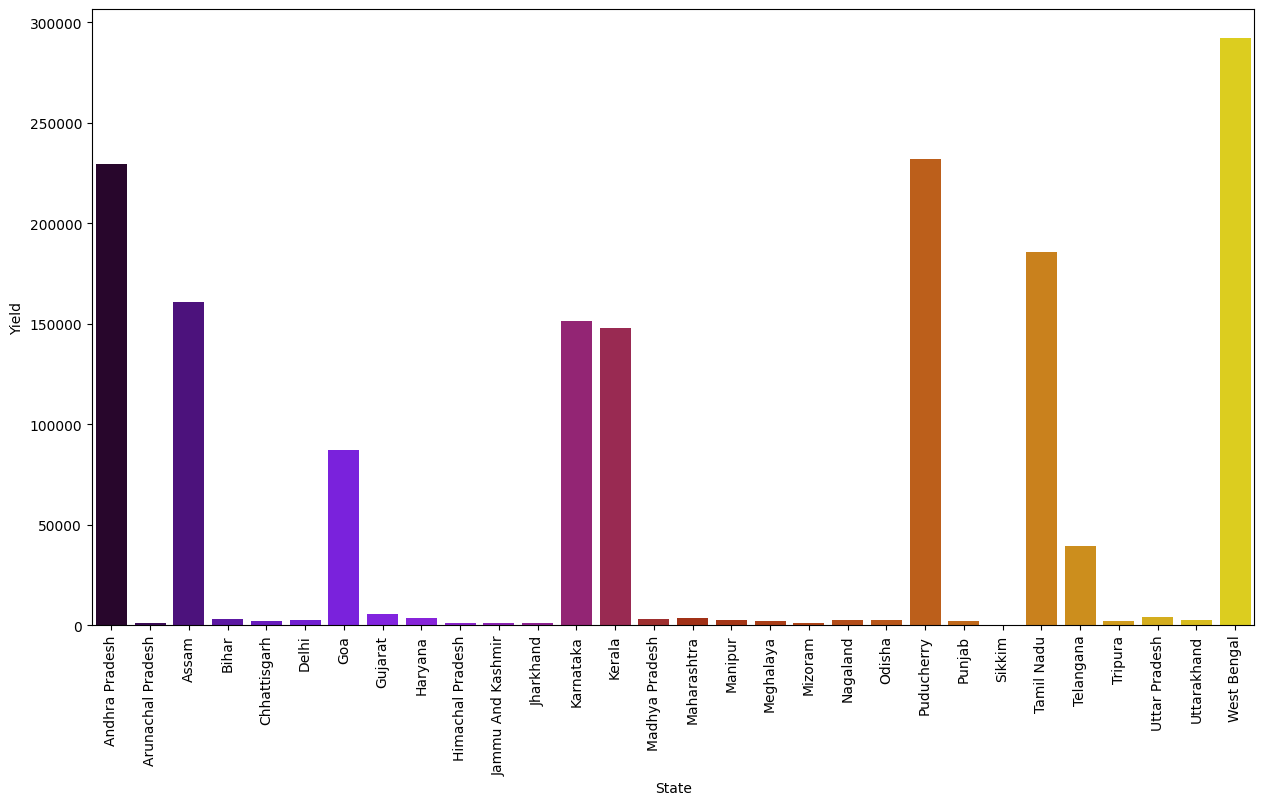

In [25]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Yield trend over the Year

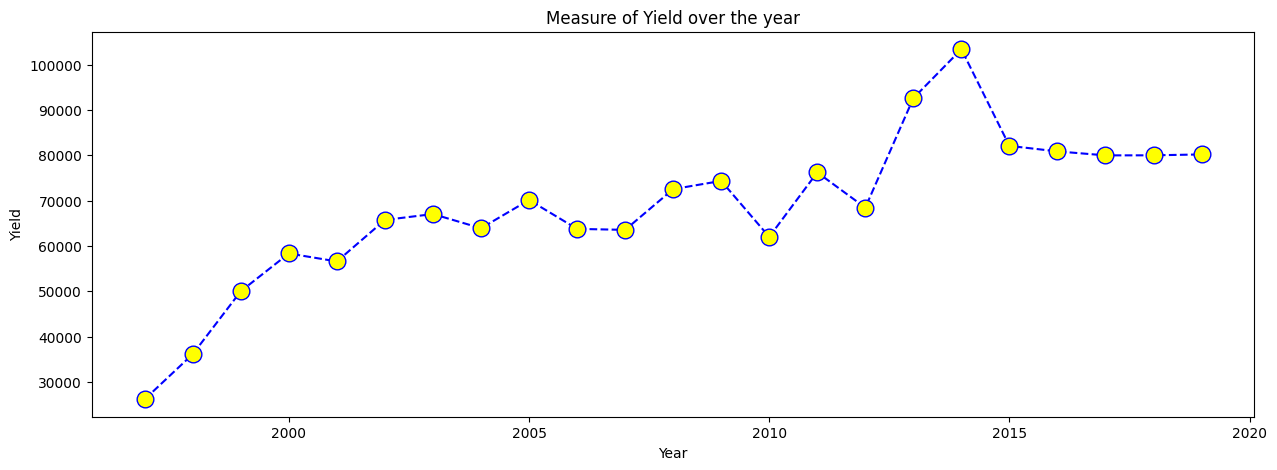

In [26]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

Top 10 states by Total Yield

In [27]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Yield
29,West Bengal,"291,986.75"
21,Puducherry,"232,163.60"
0,Andhra Pradesh,"229,735.18"
24,Tamil Nadu,"185,813.28"
2,Assam,"160,612.65"
12,Karnataka,"151,391.87"
13,Kerala,"147,710.35"
6,Goa,"87,275.96"
25,Telangana,"39,508.73"
7,Gujarat,"5,471.63"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\1643327547.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




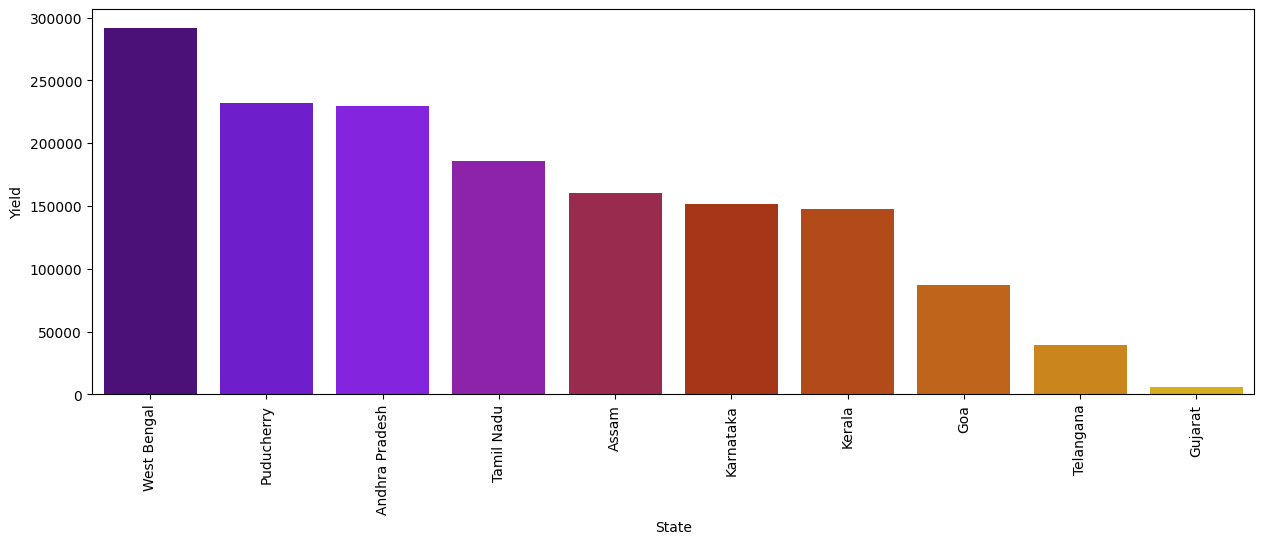

In [28]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Annual Rainfall per State


In [29]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
df_state_sort

,State,Annual_Rainfall
17,Meghalaya,"2,623,959.14"
29,West Bengal,"1,883,455.70"
12,Karnataka,"1,692,392.73"
13,Kerala,"1,536,641.30"
2,Assam,"1,531,493.36"
0,Andhra Pradesh,"1,160,139.90"
4,Chhattisgarh,"1,159,347.20"
20,Odisha,"1,098,412.40"
19,Nagaland,"1,064,884.45"
3,Bihar,"1,042,239.50"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\1392920861.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




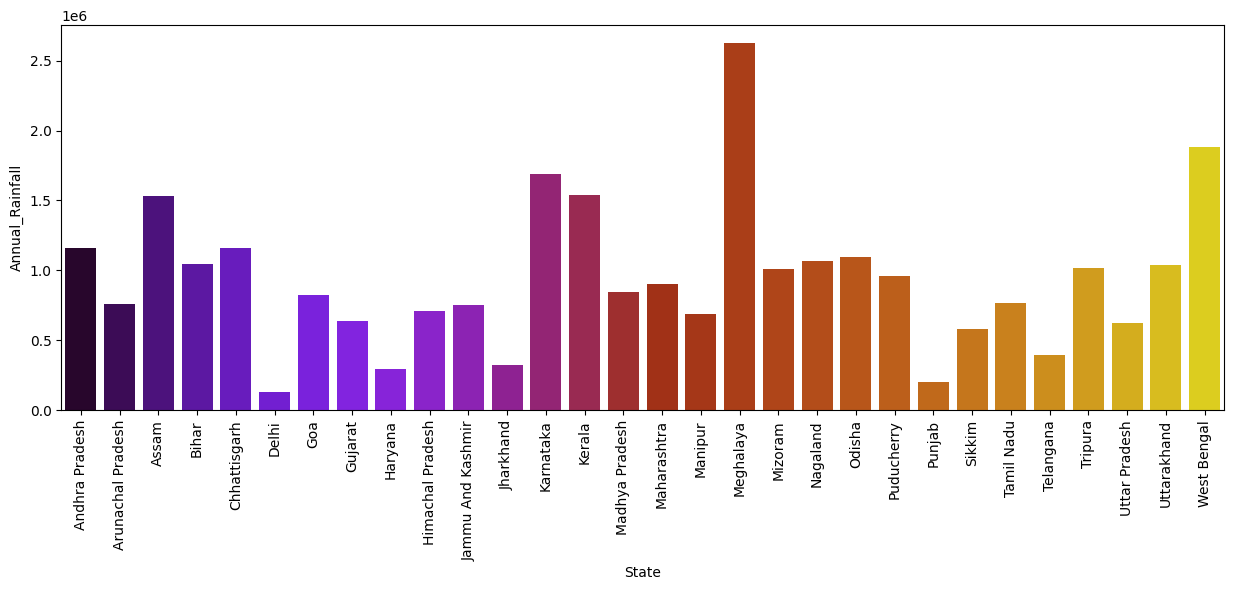

In [30]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Annual Rainfall trend over the year 

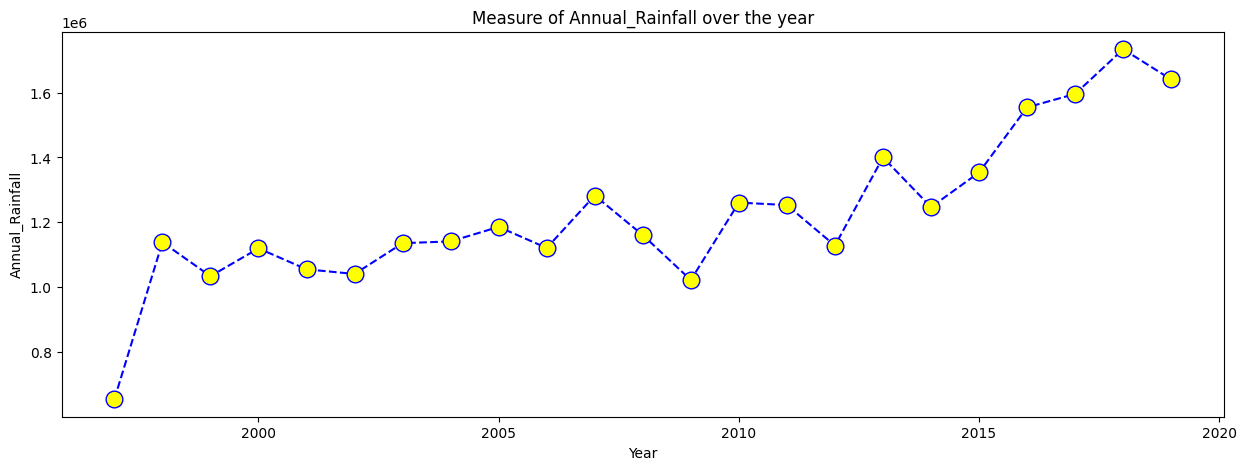

In [31]:
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

Top 10 states by Total Annual Rainfall

In [32]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Annual_Rainfall
17,Meghalaya,"2,623,959.14"
29,West Bengal,"1,883,455.70"
12,Karnataka,"1,692,392.73"
13,Kerala,"1,536,641.30"
2,Assam,"1,531,493.36"
0,Andhra Pradesh,"1,160,139.90"
4,Chhattisgarh,"1,159,347.20"
20,Odisha,"1,098,412.40"
19,Nagaland,"1,064,884.45"
3,Bihar,"1,042,239.50"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\1836783535.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




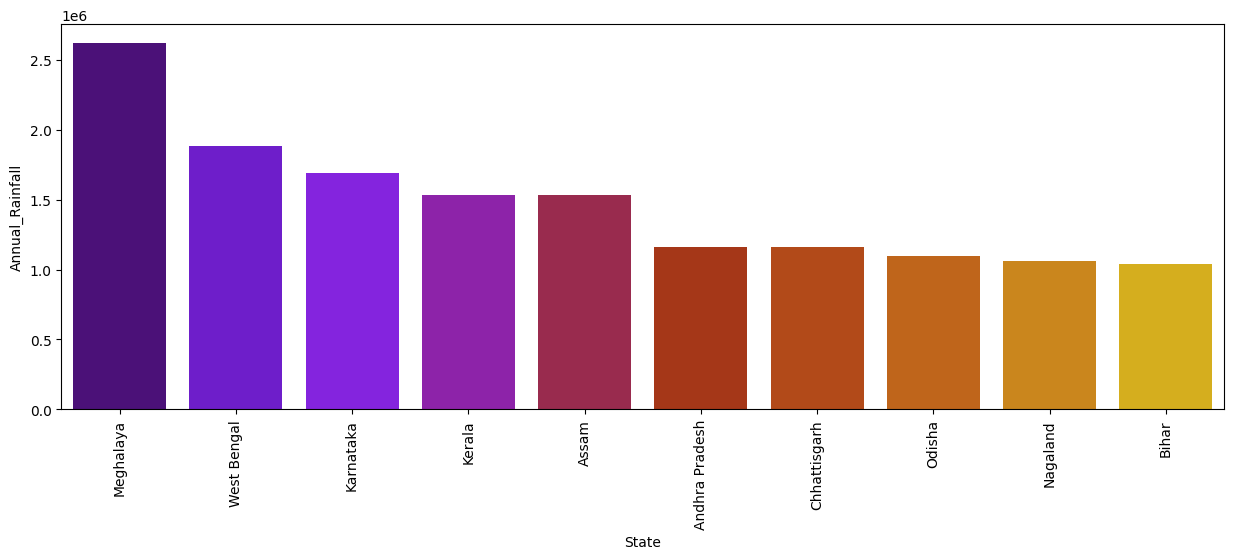

In [33]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Area per State

In [34]:
df_state_sort = df.groupby('State',as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
df_state_sort

,State,Area
27,Uttar Pradesh,"542,672,635.00"
14,Madhya Pradesh,"492,087,994.46"
15,Maharashtra,"461,939,552.15"
12,Karnataka,"257,907,399.00"
0,Andhra Pradesh,"238,925,335.00"
29,West Bengal,"237,682,264.87"
7,Gujarat,"222,434,333.20"
3,Bihar,"167,995,431.00"
22,Punjab,"162,040,200.00"
8,Haryana,"131,506,993.60"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\3664843835.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




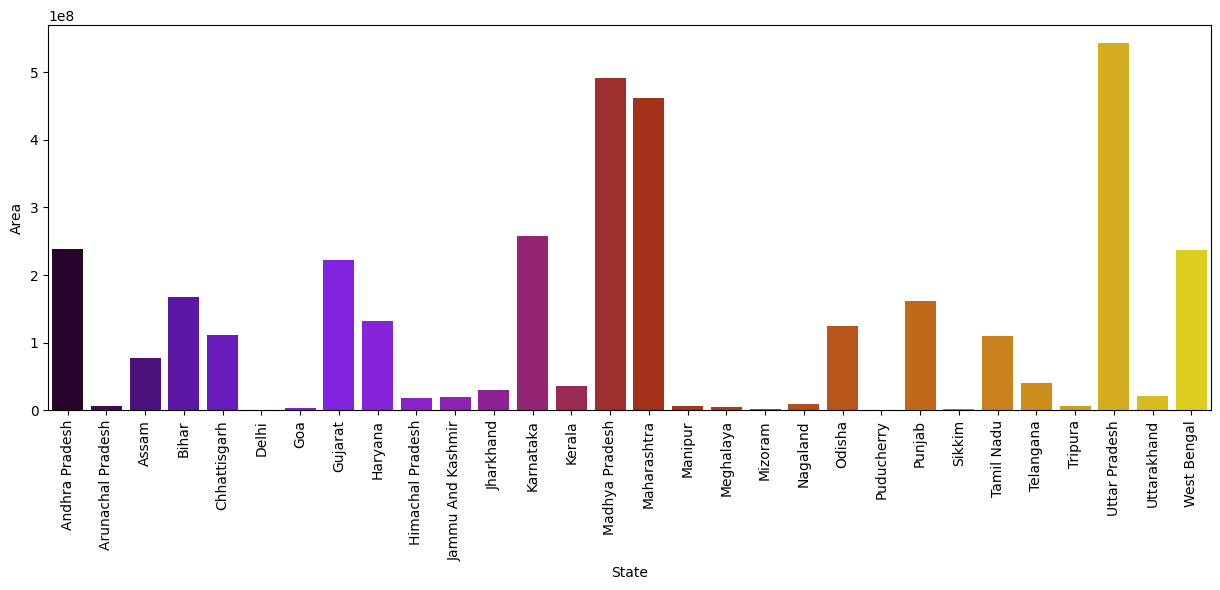

In [35]:
df_state = df.groupby('State',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Area trend over the year

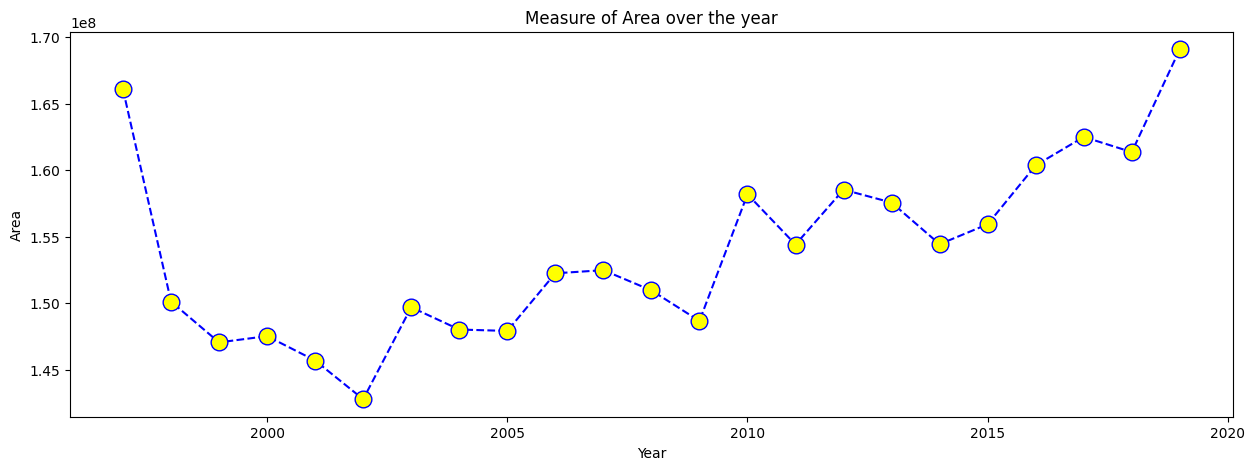

In [36]:
df_state = df.groupby('Crop_Year',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Area'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Measure of Area over the year')
plt.show()

Top 10 states by Total Area

In [37]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Area
27,Uttar Pradesh,"542,672,635.00"
14,Madhya Pradesh,"492,087,994.46"
15,Maharashtra,"461,939,552.15"
12,Karnataka,"257,907,399.00"
0,Andhra Pradesh,"238,925,335.00"
29,West Bengal,"237,682,264.87"
7,Gujarat,"222,434,333.20"
3,Bihar,"167,995,431.00"
22,Punjab,"162,040,200.00"
8,Haryana,"131,506,993.60"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\1385536140.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




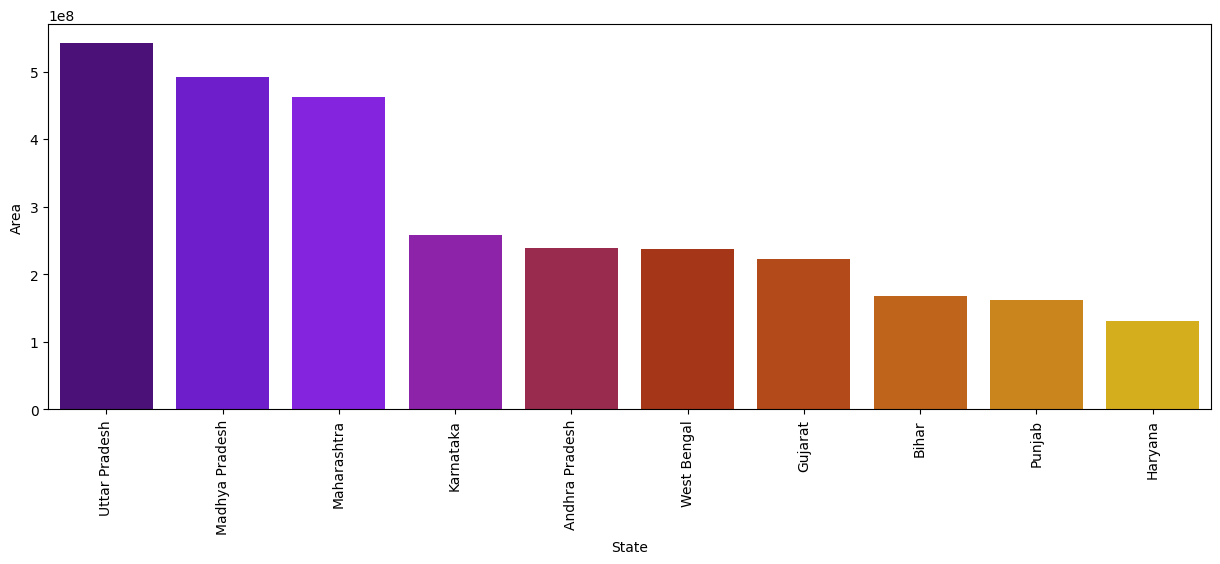

In [38]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Production per state

In [39]:
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\1756552850.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




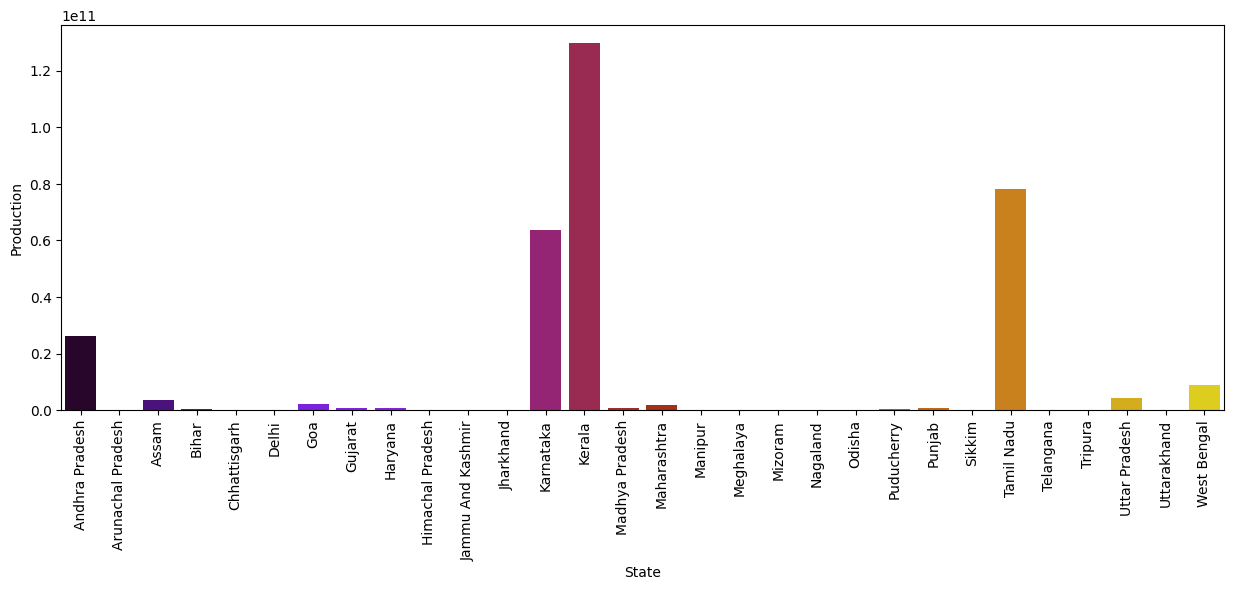

In [40]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Production trend over the year

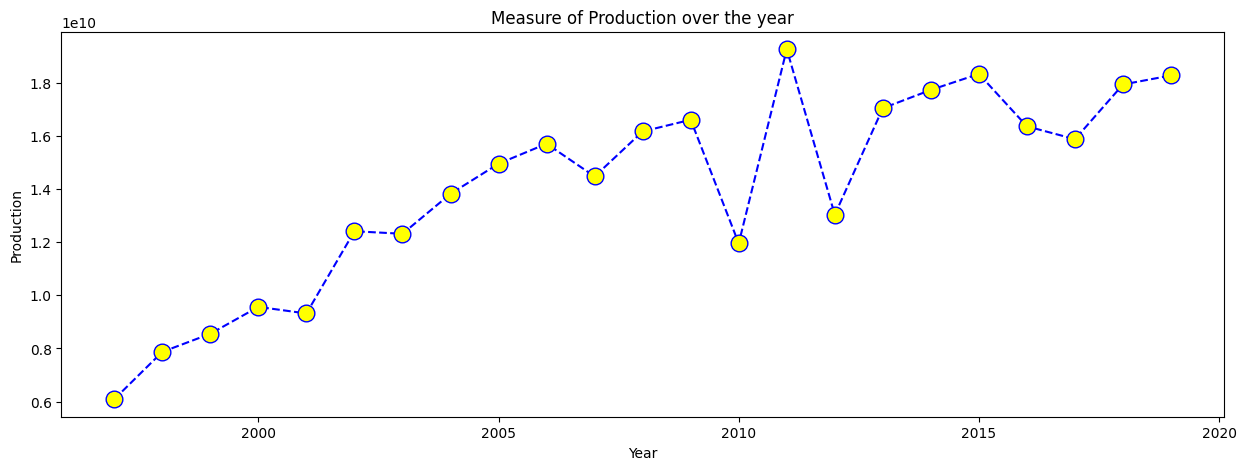

In [41]:
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

Top 10 states by Total Production

In [42]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\4083831647.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




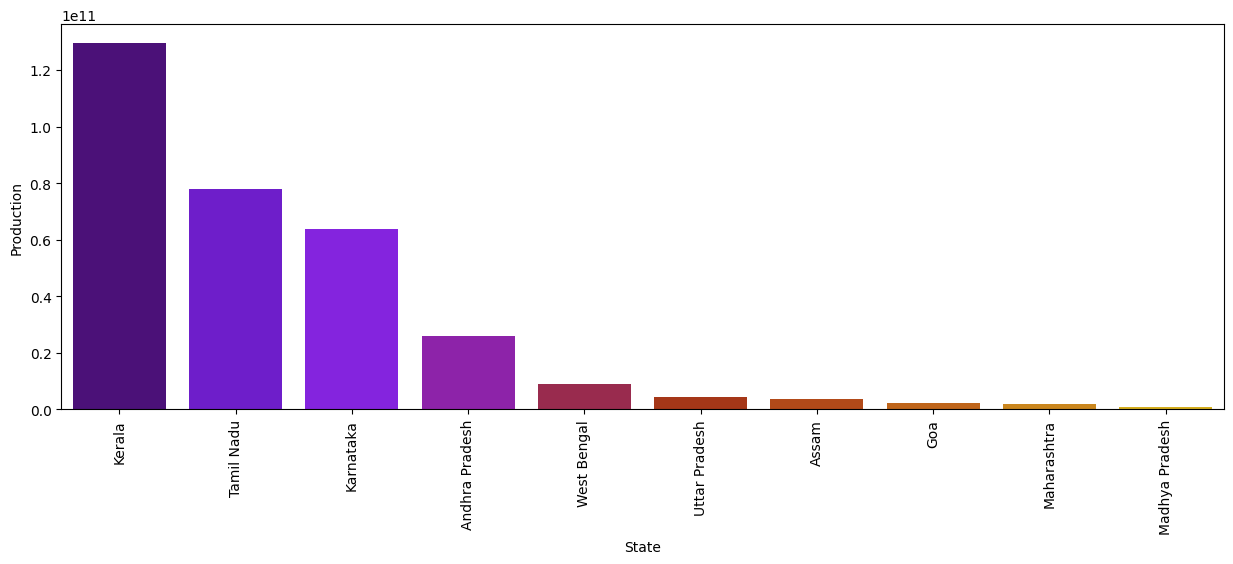

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Fertilizer per state

In [44]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

,State,Fertilizer
27,Uttar Pradesh,"72,452,818,301.10"
14,Madhya Pradesh,"67,088,002,956.53"
15,Maharashtra,"62,389,066,345.90"
12,Karnataka,"34,580,241,907.79"
0,Andhra Pradesh,"31,258,901,413.96"
7,Gujarat,"29,930,280,998.95"
29,West Bengal,"29,704,801,335.98"
3,Bihar,"22,202,119,051.38"
22,Punjab,"21,652,297,765.00"
8,Haryana,"17,645,132,988.55"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\2234523760.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




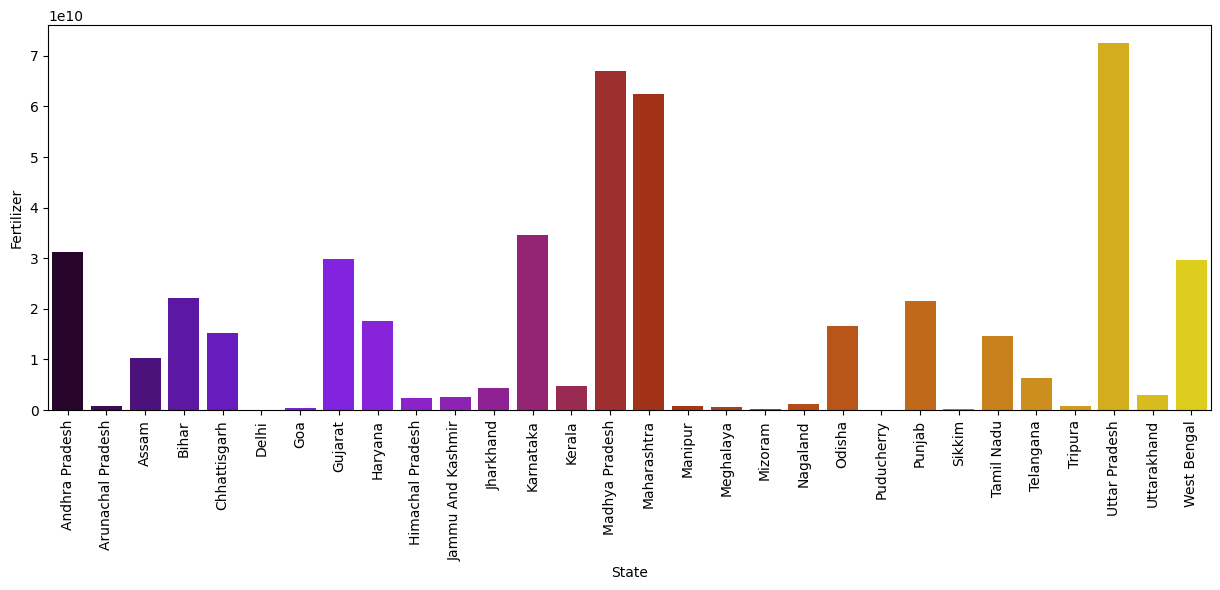

In [45]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Fertilizer trend over the year

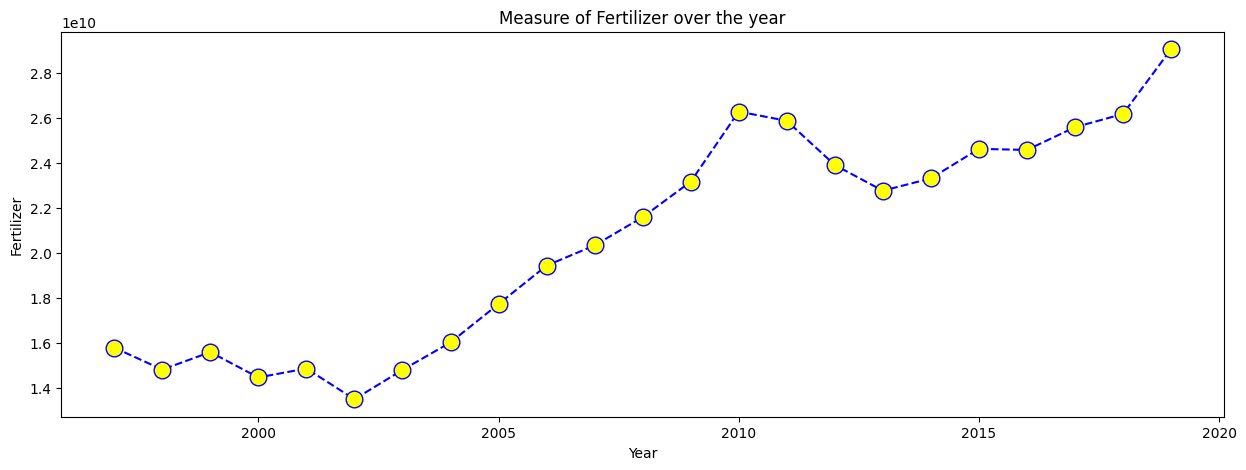

In [46]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

Top 10 states by Total Fertilizer

In [47]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,"72,452,818,301.10"
14,Madhya Pradesh,"67,088,002,956.53"
15,Maharashtra,"62,389,066,345.90"
12,Karnataka,"34,580,241,907.79"
0,Andhra Pradesh,"31,258,901,413.96"
7,Gujarat,"29,930,280,998.95"
29,West Bengal,"29,704,801,335.98"
3,Bihar,"22,202,119,051.38"
22,Punjab,"21,652,297,765.00"
8,Haryana,"17,645,132,988.55"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\2037488524.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




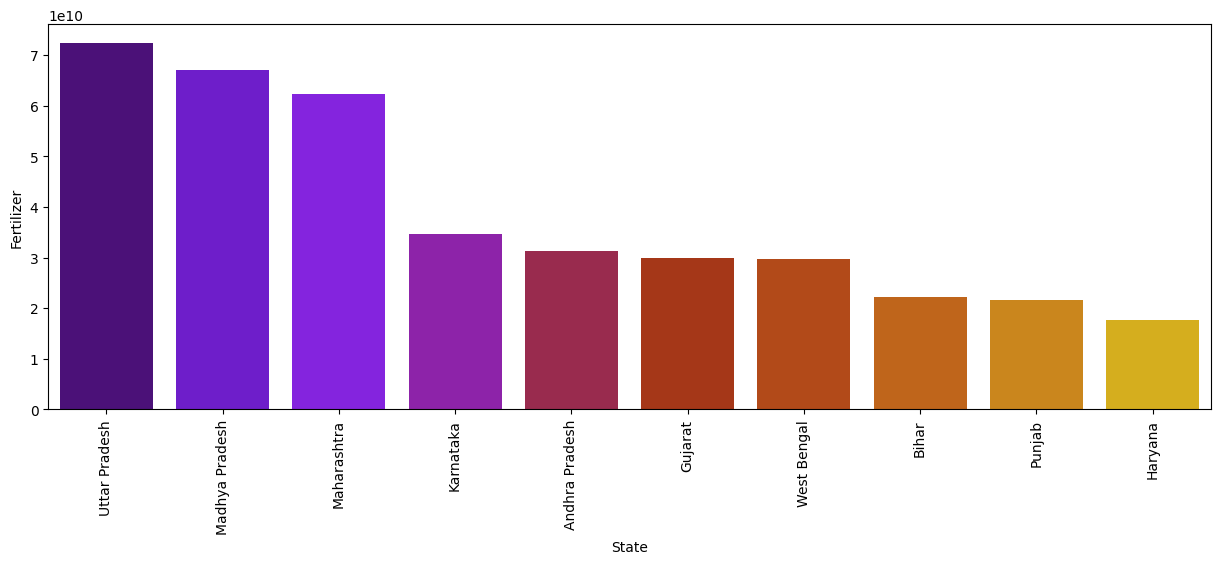

In [48]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Pesticide per state 

In [49]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

,State,Pesticide
27,Uttar Pradesh,"147,133,481.22"
14,Madhya Pradesh,"135,990,782.02"
15,Maharashtra,"124,688,508.91"
12,Karnataka,"69,173,115.92"
29,West Bengal,"66,126,649.48"
0,Andhra Pradesh,"62,107,242.85"
7,Gujarat,"60,067,111.89"
3,Bihar,"45,310,803.07"
22,Punjab,"43,752,763.00"
8,Haryana,"35,710,255.77"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\723208696.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




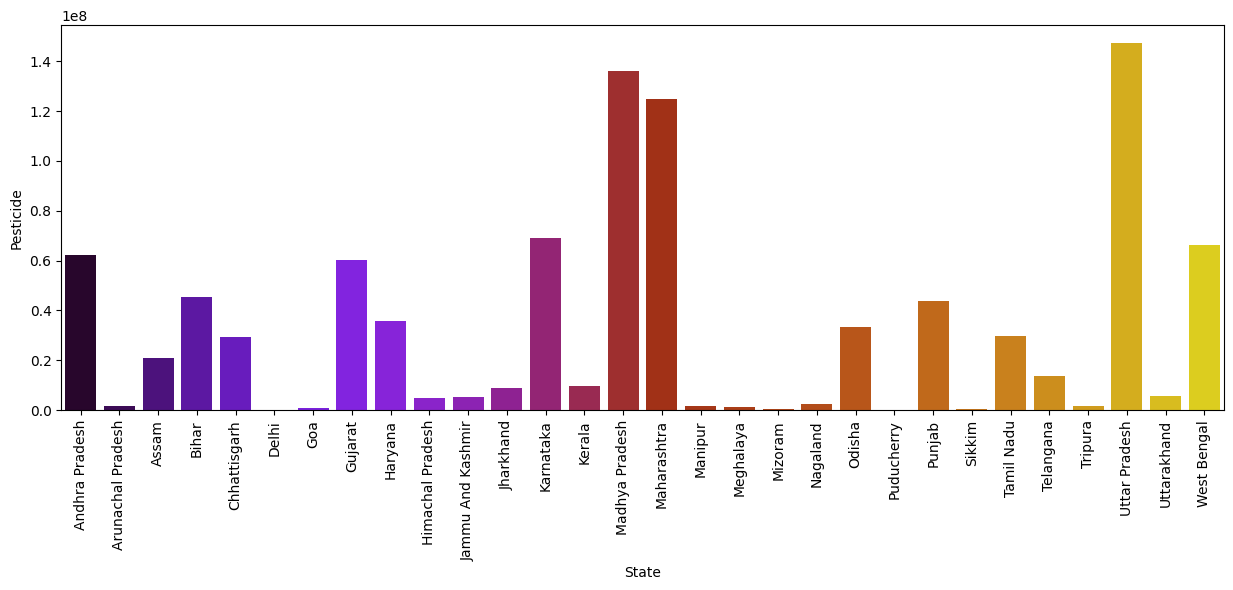

In [50]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

Pesticide trend over the year

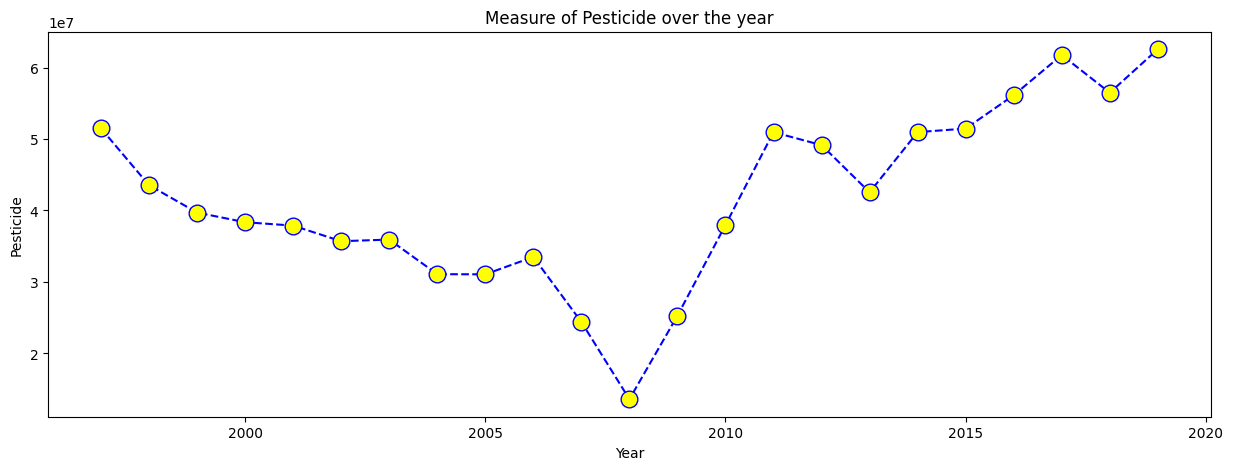

In [51]:
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

Top 10 state by Total pesticide

In [52]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,"147,133,481.22"
14,Madhya Pradesh,"135,990,782.02"
15,Maharashtra,"124,688,508.91"
12,Karnataka,"69,173,115.92"
29,West Bengal,"66,126,649.48"
0,Andhra Pradesh,"62,107,242.85"
7,Gujarat,"60,067,111.89"
3,Bihar,"45,310,803.07"
22,Punjab,"43,752,763.00"
8,Haryana,"35,710,255.77"


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\2127101796.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




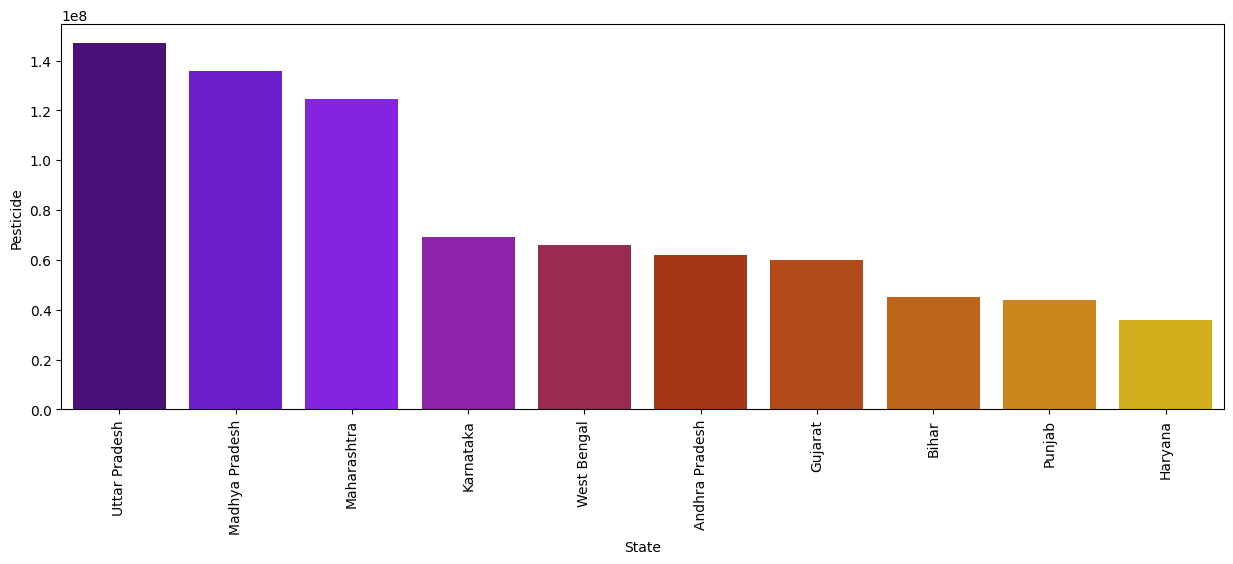

In [53]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

MODELLING WITHOUT EDA

In [54]:
df_without_eda = df.copy()

In [55]:
df_without_eda.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,"73,814.00",56708,"2,051.40","7,024,878.38","22,882.34",0.80
1,Arhar/Tur,1997,Kharif,Assam,"6,637.00",4685,"2,051.40","631,643.29","2,057.47",0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,"2,051.40","75,755.32",246.76,0.24
3,Coconut,1997,Whole Year,Assam,"19,656.00",126905000,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,Cotton(Lint),1997,Kharif,Assam,"1,739.00",794,"2,051.40","165,500.63",539.09,0.42
5,Dry Chillies,1997,Whole Year,Assam,"13,587.00",9073,"2,051.40","1,293,074.79","4,211.97",0.64
6,Gram,1997,Rabi,Assam,"2,979.00",1507,"2,051.40","283,511.43",923.49,0.47
7,Jute,1997,Kharif,Assam,"94,520.00",904095,"2,051.40","8,995,468.40","29,301.20",9.92
8,Linseed,1997,Rabi,Assam,"10,098.00",5158,"2,051.40","961,026.66","3,130.38",0.46
9,Maize,1997,Kharif,Assam,"19,216.00",14721,"2,051.40","1,828,786.72","5,956.96",0.62


In [56]:
# Drop "Area" and 'Production' columns if they exist
df_without_eda = df_without_eda.drop(columns=['Area', 'Production'], axis=1, errors='ignore')


In [57]:
df_without_eda.head()

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,"2,051.40","7,024,878.38","22,882.34",0.80
1,Arhar/Tur,1997,Kharif,Assam,"2,051.40","631,643.29","2,057.47",0.71
2,Castor Seed,1997,Kharif,Assam,"2,051.40","75,755.32",246.76,0.24
3,Coconut,1997,Whole Year,Assam,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,Cotton(Lint),1997,Kharif,Assam,"2,051.40","165,500.63",539.09,0.42


ONE HOT ENCODING

In [58]:
category_columns = df_without_eda.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [59]:
df_without_eda = pd.get_dummies(df_without_eda, columns = category_columns, drop_first=True)

In [60]:
df_without_eda.shape

(19652, 93)

In [61]:
df_without_eda.head(10)

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,"2,051.40","7,024,878.38","22,882.34",0.80,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,"2,051.40","631,643.29","2,057.47",0.71,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997,"2,051.40","75,755.32",246.76,0.24,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,"2,051.40","1,870,661.52","6,093.36","5,238.05",False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1997,"2,051.40","165,500.63",539.09,0.42,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997,"2,051.40","1,293,074.79","4,211.97",0.64,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1997,"2,051.40","283,511.43",923.49,0.47,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1997,"2,051.40","8,995,468.40","29,301.20",9.92,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1997,"2,051.40","961,026.66","3,130.38",0.46,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1997,"2,051.40","1,828,786.72","5,956.96",0.62,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
boolean_cols_auto = df_without_eda.select_dtypes(include=['bool']).columns
df_without_eda[boolean_cols_auto] = df_without_eda[boolean_cols_auto].astype(int)

In [63]:
df_without_eda.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,"2,051.40","7,024,878.38","22,882.34",0.80,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,"2,051.40","631,643.29","2,057.47",0.71,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,"2,051.40","75,755.32",246.76,0.24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997,"2,051.40","1,870,661.52","6,093.36","5,238.05",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,"2,051.40","165,500.63",539.09,0.42,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the data into dependent and independent variable

In [64]:
x = df_without_eda.drop(['Yield'], axis = 1)
y = df_without_eda['Yield']

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 92)
y_train - >   (15721,)
x_test  - >   (3931, 92)
y_test  - >   (3931,)


Store performance metrices in the list

In [67]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

Create a function to evaluate model

In [68]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

Simple Linear regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.83%, Adjusted R² = 84.74%, RMSE = 346.8866
Testing Data : R² = 81.87%, Adjusted R² = 81.44%, RMSE = 353.9153



Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.74%, RMSE = 346.9668
Testing Data : R² = 81.87%, Adjusted R² = 81.43%, RMSE = 353.9572



c:\Users\Dheeraj Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.51929e-20): result may not be accurate.



Lasso Regression

In [71]:
from sklearn.linear_model import Lasso

evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.81%, Adjusted R² = 84.72%, RMSE = 347.0942
Testing Data : R² = 81.86%, Adjusted R² = 81.42%, RMSE = 354.0458



Elastic Net regression

In [72]:
from sklearn.linear_model import ElasticNet


evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 26.81%, Adjusted R² = 26.38%, RMSE = 761.9943
Testing Data : R² = 25.59%, Adjusted R² = 23.80%, RMSE = 716.9950



TREE Based Models

Decision tree Regression

In [73]:
from sklearn.tree import DecisionTreeRegressor


evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 94.10%, Adjusted R² = 93.96%, RMSE = 201.9345



Random Forest Regression

In [74]:
from sklearn.ensemble import RandomForestRegressor


evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.56%, Adjusted R² = 99.56%, RMSE = 59.1065
Testing Data : R² = 98.32%, Adjusted R² = 98.28%, RMSE = 107.7138



Ada Boost regression

In [75]:
from sklearn.ensemble import AdaBoostRegressor


evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 94.44%, Adjusted R² = 94.40%, RMSE = 210.0954
Testing Data : R² = 93.13%, Adjusted R² = 92.97%, RMSE = 217.8450



Gradient Boosting regression

In [76]:

from sklearn.ensemble import GradientBoostingRegressor


evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.07%, Adjusted R² = 99.06%, RMSE = 86.0406
Testing Data : R² = 97.95%, Adjusted R² = 97.90%, RMSE = 119.0634



LGBM Regression 

In [77]:
from lightgbm import LGBMRegressor


evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 91
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.57%, Adjusted R² = 97.56%, RMSE = 138.7803
Testing Data : R² = 94.69%, Adjusted R² = 94.56%, RMSE = 191.5109



XGB regression

In [ ]:
from xgboost import XGBRegressor

evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 3.6557
Testing Data : R² = 98.40%, Adjusted R² = 98.36%, RMSE = 105.2820



Catboost regression

In [79]:
from catboost import CatBoostRegressor


evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.96%, Adjusted R² = 99.96%, RMSE = 17.3960
Testing Data : R² = 97.91%, Adjusted R² = 97.86%, RMSE = 120.1761



Instance-Based Learning

K-nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsRegressor

evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 20.46%, Adjusted R² = 19.99%, RMSE = 794.3327
Testing Data : R² = -20.80%, Adjusted R² = -23.70%, RMSE = 913.5520



Ensemble Methods 

Voting Regressor

In [81]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [82]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [83]:
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [84]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 86.11%, Adjusted R² = 86.03%, RMSE = 331.9447
Testing Data : R² = 78.00%, Adjusted R² = 77.47%, RMSE = 389.8875



Bagging Regresor

In [85]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


base_regressor = DecisionTreeRegressor(random_state=42)

In [86]:
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

In [87]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 98.97%, Adjusted R² = 98.96%, RMSE = 90.3709
Testing Data : R² = 96.49%, Adjusted R² = 96.41%, RMSE = 155.7289



Stacking Regressor

In [88]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [89]:
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [90]:
meta_model = KNeighborsRegressor()

In [91]:
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

In [92]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 97.77%, Adjusted R² = 97.76%, RMSE = 132.9807
Testing Data : R² = 97.45%, Adjusted R² = 97.38%, RMSE = 132.8351



Model Comparison

In [93]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [94]:
# Ensure all lists are the same length
min_len = min(
    len(models),
    len(training_scores_r2),
    len(training_scores_adj_r2),
    len(training_scores_rmse),
    len(testing_scores_r2),
    len(testing_scores_adj_r2),
    len(testing_scores_rmse)
)

df_model = pd.DataFrame({
    "Algorithms": models[:min_len],
    "Training Score R2": training_scores_r2[:min_len],
    "Training Score Adjusted R2": training_scores_adj_r2[:min_len],
    "Training Score RMSE": training_scores_rmse[:min_len],
    "Testing Score R2": testing_scores_r2[:min_len],
    "Testing Score Adjusted R2": testing_scores_adj_r2[:min_len],
    "Testing Score RMSE": testing_scores_rmse[:min_len],
})

df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
9,XGBoost,100.00,100.00,3.66,98.40,98.36,105.28
5,Random Forest,99.56,99.56,59.11,98.32,98.28,107.71
7,Gradient Boost,99.07,99.06,86.04,97.95,97.90,119.06
10,CatBoost,99.96,99.96,17.40,97.91,97.86,120.18
14,Stacking Regressor,97.77,97.76,132.98,97.45,97.38,132.84
13,Bagging Regressor,98.97,98.96,90.37,96.49,96.41,155.73
8,LGBM,97.57,97.56,138.78,94.69,94.56,191.51
4,Decision Tree,100.00,100.00,0.00,94.10,93.96,201.93
6,Ada Boost,94.44,94.40,210.10,93.13,92.97,217.84
0,Linear Regression,84.83,84.74,346.89,81.87,81.44,353.92


Plotting bar chart for training and testing scores

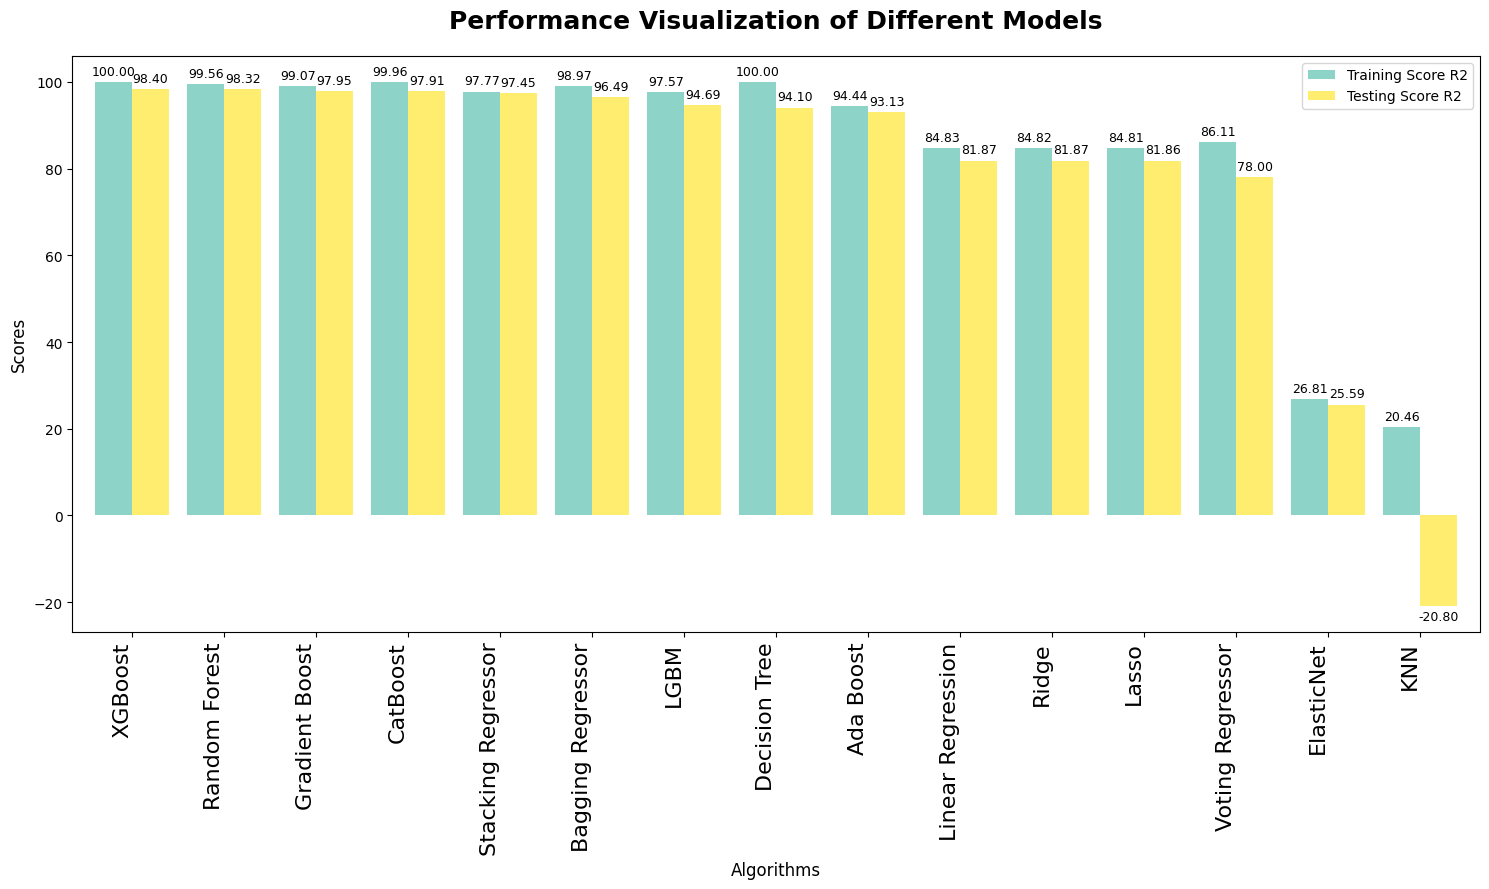

In [95]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)
# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

Plotting bar chart for training and testing scores

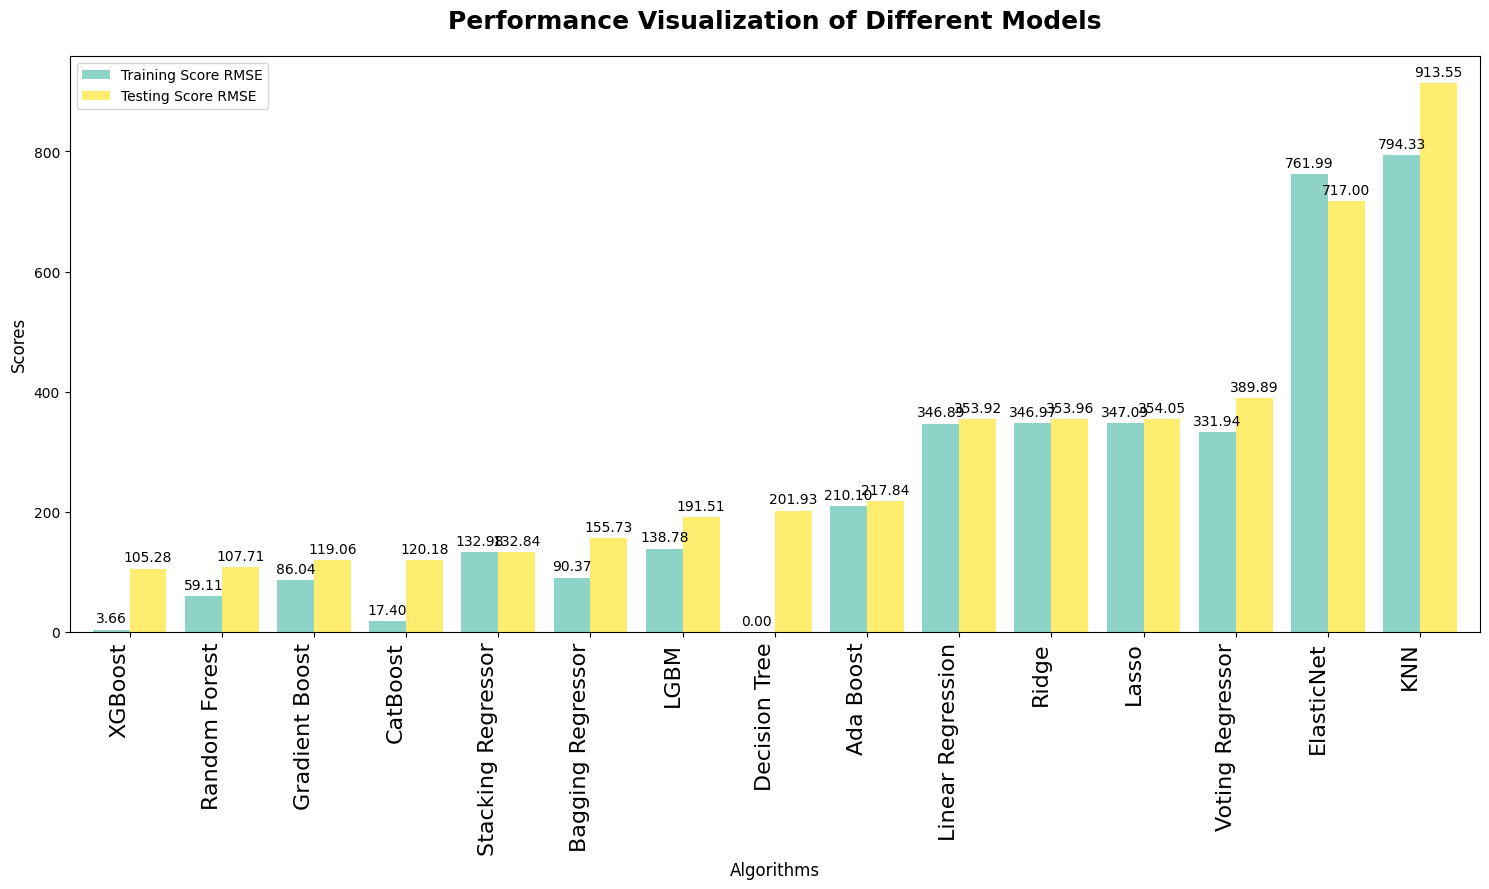

In [96]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

Modelling after EDA

In [97]:
df_with_eda = df.copy()

In [98]:
df_with_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,"73,814.00",56708,"2,051.40","7,024,878.38","22,882.34",0.80
1,Arhar/Tur,1997,Kharif,Assam,"6,637.00",4685,"2,051.40","631,643.29","2,057.47",0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,"2,051.40","75,755.32",246.76,0.24
3,Coconut,1997,Whole Year,Assam,"19,656.00",126905000,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,Cotton(Lint),1997,Kharif,Assam,"1,739.00",794,"2,051.40","165,500.63",539.09,0.42


Drop Area and Production columns

In [99]:
df_with_eda = df_with_eda.drop(['Area', 'Production'], axis=1)

In [100]:
df_with_eda.head ()

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,"2,051.40","7,024,878.38","22,882.34",0.80
1,Arhar/Tur,1997,Kharif,Assam,"2,051.40","631,643.29","2,057.47",0.71
2,Castor Seed,1997,Kharif,Assam,"2,051.40","75,755.32",246.76,0.24
3,Coconut,1997,Whole Year,Assam,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,Cotton(Lint),1997,Kharif,Assam,"2,051.40","165,500.63",539.09,0.42


Checking the skewness

In [101]:
skewness = df_with_eda[['Annual_Rainfall','Fertilizer','Pesticide']].skew().sort_values()
skewness

Annual_Rainfall    2.13
Fertilizer        13.40
Pesticide         25.61
dtype: float64

C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\3249839194.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\3249839194.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Dheeraj Kumar\AppData\Local\Temp\ipykernel_16488\3249839194.py:7: UserW

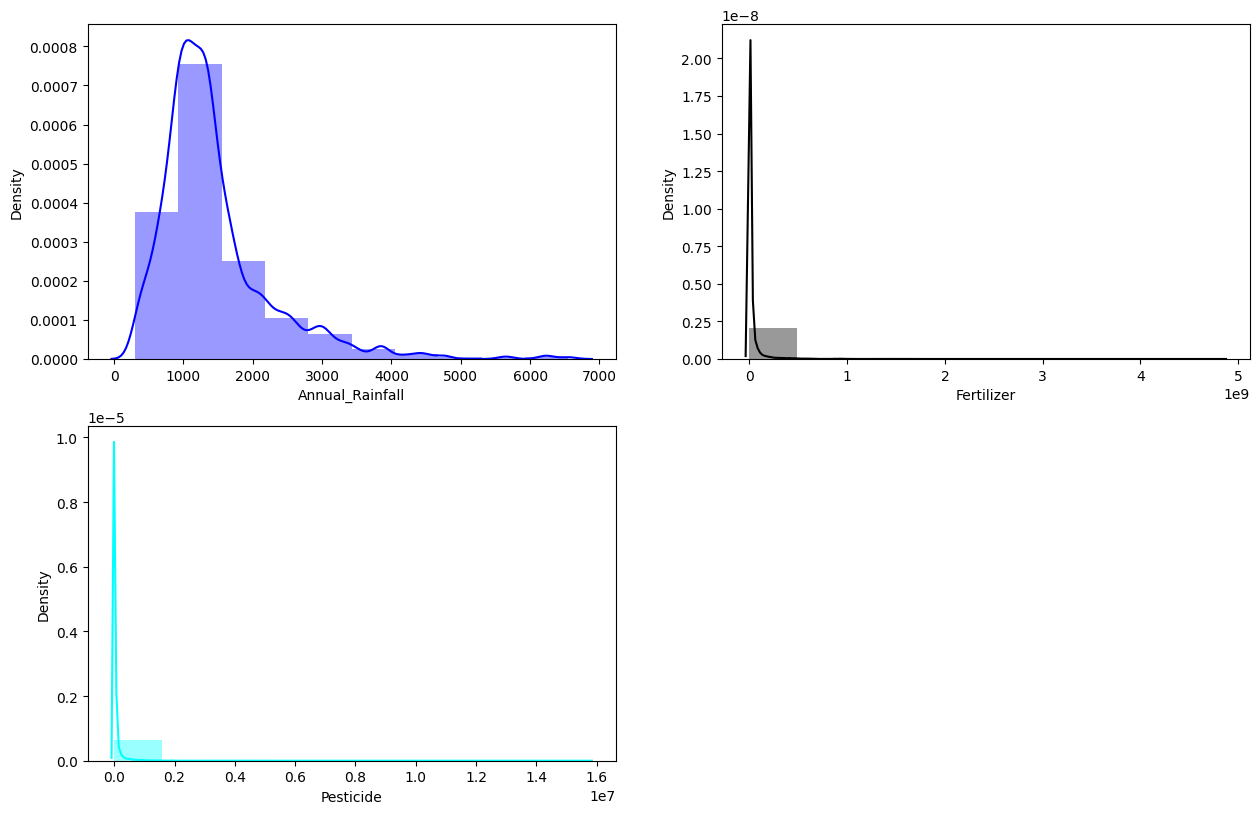

In [102]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()

Variance inflation Factor

In [103]:
df_with_eda.head()

,Crop,Crop_Year,Season,State,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,"2,051.40","7,024,878.38","22,882.34",0.80
1,Arhar/Tur,1997,Kharif,Assam,"2,051.40","631,643.29","2,057.47",0.71
2,Castor Seed,1997,Kharif,Assam,"2,051.40","75,755.32",246.76,0.24
3,Coconut,1997,Whole Year,Assam,"2,051.40","1,870,661.52","6,093.36","5,238.05"
4,Cotton(Lint),1997,Kharif,Assam,"2,051.40","165,500.63",539.09,0.42


In [104]:
exclude_columns= ['Crop','Crop_Year','Season','State','Yield']

In [105]:
vif_columns = [col for col in df_with_eda.columns if col not in exclude_columns]

In [106]:
vif1 = df_with_eda[vif_columns].copy()

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = vif1
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [108]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
1,12.00,Fertilizer
2,11.95,Pesticide
0,1.03,Annual_Rainfall


In [109]:
vif2 =vif1.copy()

Remove fertilizer feature

In [110]:
vif2.drop(['Fertilizer'], axis=1, inplace=True)

In [111]:
exclude_columns = ['Crop_Year', 'Crop', 'State', 'Season','Area', 'Yield']

In [112]:
vif_columns = [col for col in df_with_eda.columns if col not in exclude_columns]

In [113]:
variable = vif2
vif_columns = variable.columns  # Ensure columns match
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
1,1.02,Pesticide
0,1.02,Annual_Rainfall


variance inflation Factor (VIF) was checked, but no features were removed because the model achieved good accuracy without removing any features.


One Hot Encoding

In [114]:
df_with_eda_encoding = df_with_eda.copy()
df_with_eda_encoding = df_with_eda_encoding.drop(['Crop_Year'], axis = 1)

In [115]:
df_with_eda_encoding = df_with_eda_encoding.drop(['Fertilizer'], axis = 1)

In [116]:
df_with_eda_encoding.head()

,Crop,Season,State,Annual_Rainfall,Pesticide,Yield
0,Arecanut,Whole Year,Assam,"2,051.40","22,882.34",0.80
1,Arhar/Tur,Kharif,Assam,"2,051.40","2,057.47",0.71
2,Castor Seed,Kharif,Assam,"2,051.40",246.76,0.24
3,Coconut,Whole Year,Assam,"2,051.40","6,093.36","5,238.05"
4,Cotton(Lint),Kharif,Assam,"2,051.40",539.09,0.42


In [117]:
category_columns = df_with_eda_encoding.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [118]:
df_with_eda_encoding = pd.get_dummies(df_with_eda_encoding, columns = category_columns, drop_first=True)

In [119]:
boolean_cols_auto = df_with_eda_encoding.select_dtypes(include=['bool']).columns
df_with_eda_encoding[boolean_cols_auto] = df_with_eda_encoding[boolean_cols_auto].astype(int)

In [120]:
df_with_eda_encoding.head()

,Annual_Rainfall,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,"2,051.40","22,882.34",0.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"2,051.40","2,057.47",0.71,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"2,051.40",246.76,0.24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"2,051.40","6,093.36","5,238.05",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"2,051.40",539.09,0.42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
x = df_with_eda_encoding.drop(['Yield'], axis = 1)
y = df_with_eda_encoding['Yield']

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 90)
y_train - >   (15721,)
x_test  - >   (3931, 90)
y_test  - >   (3931,)


Transformation using the method 'Yeo-Johnson'

In [124]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

In [125]:
x_train_scaled = pt.fit_transform(x_train)
x_test_scaled = pt.transform(x_test)

Storing the performance metrices

In [126]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

create a function to evaluate model

In [127]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

Modelling after transformation

Simple Linear Regression

In [128]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.73%, RMSE = 347.0002
Testing Data : R² = 81.87%, Adjusted R² = 81.45%, RMSE = 353.8658



Ridge regression

In [129]:
ridge_regressor = Ridge(
    alpha=1.0,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
    positive=False
)

In [130]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.73%, RMSE = 347.0002
Testing Data : R² = 81.87%, Adjusted R² = 81.45%, RMSE = 353.8651



Lasso Regression

In [131]:
lasso_regressor = Lasso(
    alpha=1.0,
    fit_intercept=True,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    random_state=None,
    positive=False
)

In [132]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.80%, Adjusted R² = 84.71%, RMSE = 347.2556
Testing Data : R² = 81.85%, Adjusted R² = 81.43%, RMSE = 354.0883



Elastic Net Regression

In [133]:
elasticnet_regressor = ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    random_state=None,
    positive=False
)

In [134]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 75.54%, Adjusted R² = 75.40%, RMSE = 440.5166
Testing Data : R² = 72.88%, Adjusted R² = 72.25%, RMSE = 432.8184



Tree Based Models

Decision Tree regressor

In [135]:
decisiontree_regressor = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=42,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0
)

In [136]:
evaluate_model_performance(
    model=decisiontree_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0019
Testing Data : R² = 96.46%, Adjusted R² = 96.38%, RMSE = 156.4167



Random forest regressor

In [137]:
randomforest_regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    max_samples=None,
)

In [138]:
evaluate_model_performance(
    model=randomforest_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.39%, Adjusted R² = 99.38%, RMSE = 69.7037
Testing Data : R² = 95.47%, Adjusted R² = 95.36%, RMSE = 176.8989



Ada Boost

In [139]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 93.86%, Adjusted R² = 93.83%, RMSE = 220.6906
Testing Data : R² = 92.70%, Adjusted R² = 92.53%, RMSE = 224.5947



Gradient Boosting


In [140]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 98.91%, Adjusted R² = 98.90%, RMSE = 93.1181
Testing Data : R² = 97.82%, Adjusted R² = 97.77%, RMSE = 122.7719



LGBM Boosting

In [141]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 89
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 96.75%, Adjusted R² = 96.73%, RMSE = 160.6873
Testing Data : R² = 94.79%, Adjusted R² = 94.67%, RMSE = 189.6407



c:\Users\Dheeraj Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

c:\Users\Dheeraj Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



XGB Boosting

In [142]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 99.95%, Adjusted R² = 99.95%, RMSE = 19.2660
Testing Data : R² = 97.19%, Adjusted R² = 97.12%, RMSE = 139.3308



Cat Boost

In [143]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.87%, Adjusted R² = 99.87%, RMSE = 31.5966
Testing Data : R² = 97.20%, Adjusted R² = 97.14%, RMSE = 139.0117



Instance based Learning

K-Nearest Neighbors

In [144]:
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1
)

In [145]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 97.29%, Adjusted R² = 97.27%, RMSE = 146.6222
Testing Data : R² = 97.36%, Adjusted R² = 97.30%, RMSE = 134.9854



Ensemble Methods

Voting regressor

In [146]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [147]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [148]:
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [149]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 96.87%, Adjusted R² = 96.86%, RMSE = 157.4622
Testing Data : R² = 95.56%, Adjusted R² = 95.46%, RMSE = 175.0536



Bagging Regressor

In [150]:
base_regressor = DecisionTreeRegressor(random_state=42)

In [151]:
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

In [152]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.02%, Adjusted R² = 99.02%, RMSE = 88.0073
Testing Data : R² = 95.49%, Adjusted R² = 95.38%, RMSE = 176.5826



Stacking Regressor

In [153]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [154]:
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [155]:
meta_model = KNeighborsRegressor()

In [156]:
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

In [157]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 98.40%, Adjusted R² = 98.39%, RMSE = 112.7770
Testing Data : R² = 96.93%, Adjusted R² = 96.86%, RMSE = 145.6970



In [158]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

Model Score

In [159]:
# Ensure all lists are the same length
min_len = min(
    len(models),
    len(training_scores_r2),
    len(training_scores_adj_r2),
    len(training_scores_rmse),
    len(testing_scores_r2),
    len(testing_scores_adj_r2),
    len(testing_scores_rmse)
)

df_model = pd.DataFrame({
    "Algorithms": models[:min_len],
    "Training Score R2": training_scores_r2[:min_len],
    "Training Score Adjusted R2": training_scores_adj_r2[:min_len],
    "Training Score RMSE": training_scores_rmse[:min_len],
    "Testing Score R2": testing_scores_r2[:min_len],
    "Testing Score Adjusted R2": testing_scores_adj_r2[:min_len],
    "Testing Score RMSE": testing_scores_rmse[:min_len],
})

df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
7,Gradient Boost,98.91,98.90,93.12,97.82,97.77,122.77
11,KNN,97.29,97.27,146.62,97.36,97.30,134.99
10,CatBoost,99.87,99.87,31.60,97.20,97.14,139.01
9,XGBoost,99.95,99.95,19.27,97.19,97.12,139.33
14,Stacking Regressor,98.40,98.39,112.78,96.93,96.86,145.70
4,Decision Tree,100.00,100.00,0.00,96.46,96.38,156.42
12,Voting Regressor,96.87,96.86,157.46,95.56,95.46,175.05
13,Bagging Regressor,99.02,99.02,88.01,95.49,95.38,176.58
5,Random Forest,99.39,99.38,69.70,95.47,95.36,176.90
8,LGBM,96.75,96.73,160.69,94.79,94.67,189.64


Plotting bar chart for training and testing scores

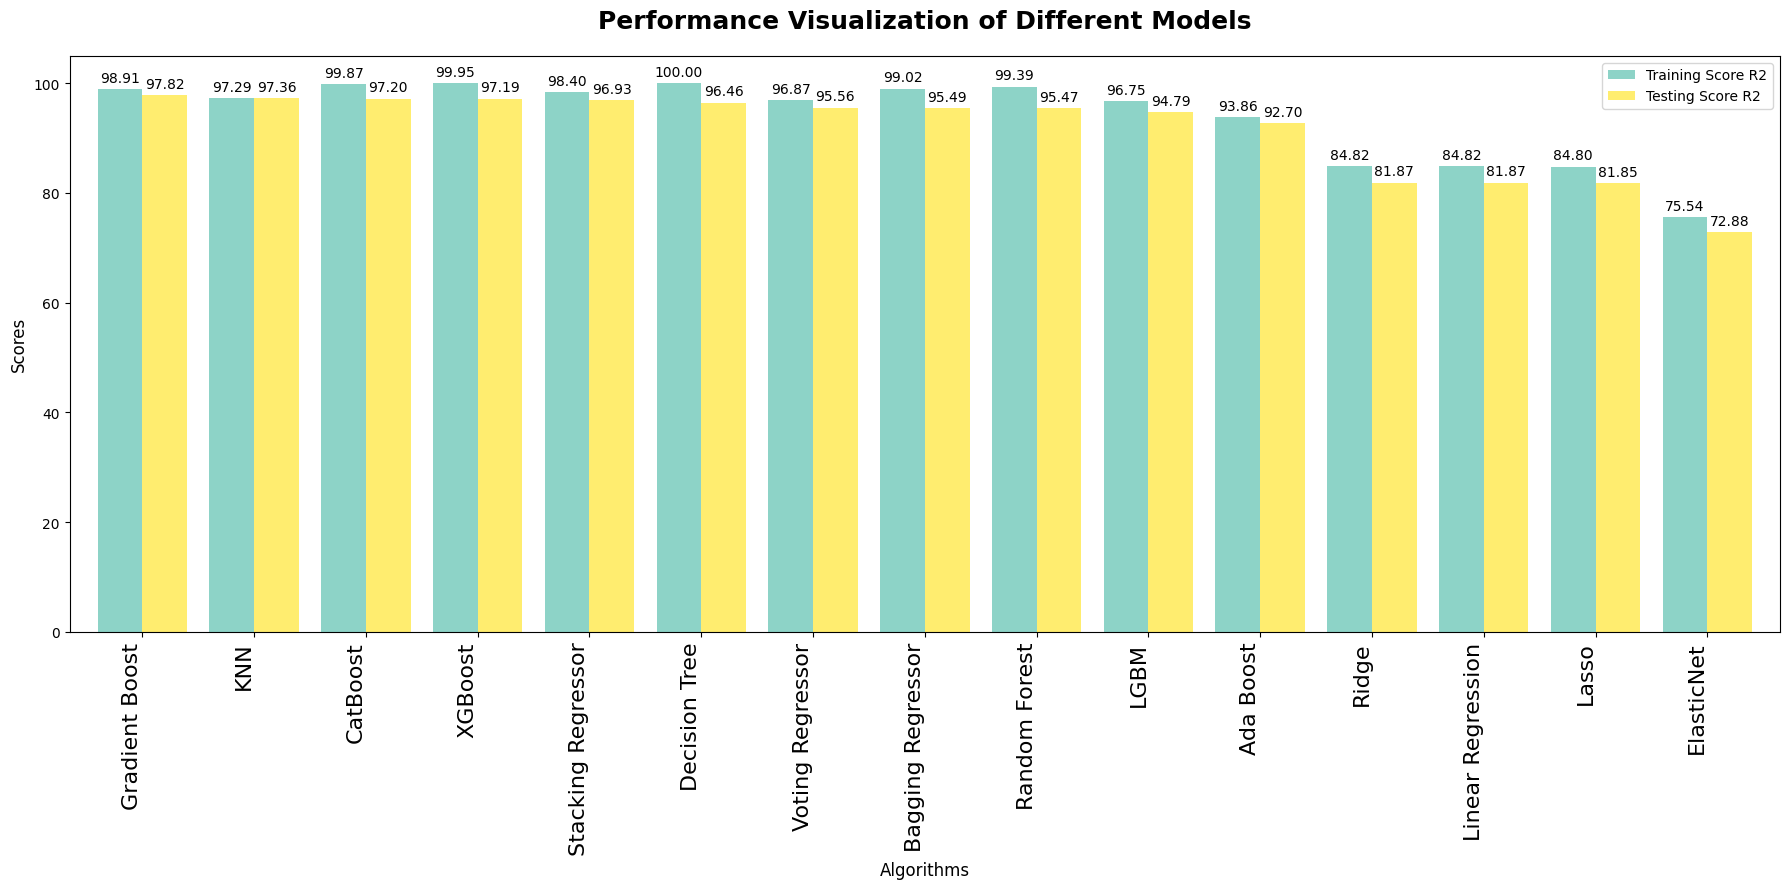

In [160]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

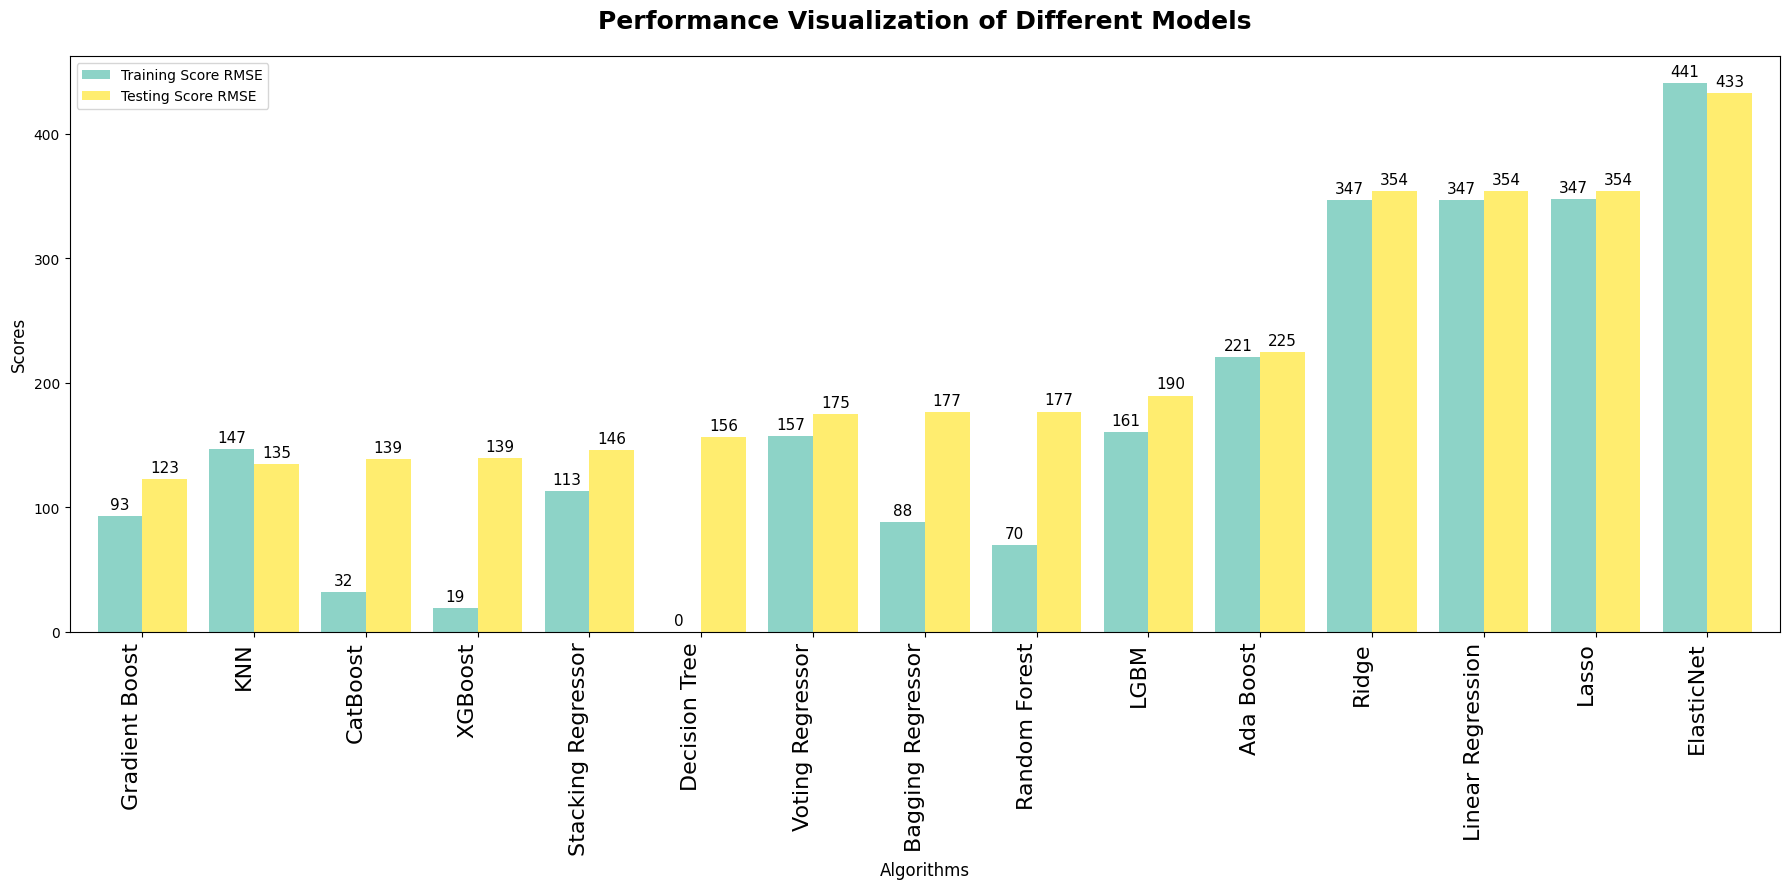

In [161]:
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()

### Key Criteria for Evaluation:

1. **High Testing R² and Adjusted R²**: Indicates better predictive accuracy on unseen data.
2. **Lower Testing RMSE**: Shows fewer errors in predictions.
3. **Avoid Overfitting**: Models with a significant gap between training and testing scores are overfitting.
4. **Model Complexity**: Balance between performance and computational efficiency.


### Analysis

| **Algorithm**        | **Testing R²** | **Testing RMSE** | **Training R²** | **RMSE Difference** |
|----------------------|----------------|------------------|------------------|---------------------|
| **Gradient Boost**   | **97.82**      | **122.72**       | 98.91            | Moderate            |
| KNN                  | 97.36          | 134.99           | 97.29            | Minimal             |
| CatBoost             | 97.20          | 139.01           | **99.87**        | Moderate            |
| XGBoost              | 97.19          | 139.33           | **99.95**        | Moderate            |
| Stacking Regressor   | 96.93          | 145.70           | 98.40            | Low                 |
| Decision Tree        | 96.46          | 156.42           | **100.00**       | High                |
| Random Forest        | 95.47          | 176.90           | 99.39            | High                |


### Best Model Recommendation

1. **Gradient Boosting Regressor:**
   - High testing R² (97.82%)
   - Low RMSE (122.72)
   - Minimal gap between training and testing scores, indicating less overfitting

2. **KNN Regressor:**
   - Testing R² of 97.36% with minimal overfitting
   - Simple algorithm compared to ensemble models, making it computationally efficient

3. **XGBoost:**
   - Slightly lower testing R² (97.19%) but robust performance

---

### Not Recommended

- **Decision Tree:** Perfect training score indicates severe overfitting.
- **Voting & Bagging Regressors:** Lower testing R² and high RMSE values.
- **Linear Regression, Ridge, Lasso, ElasticNet:** Poor predictive accuracy.

---

### Final Recommendation: **Gradient Boosting Regressor**

It provides an excellent balance of high accuracy, low error, and robustness without overfitting.
